## DNN Example for Fashion MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

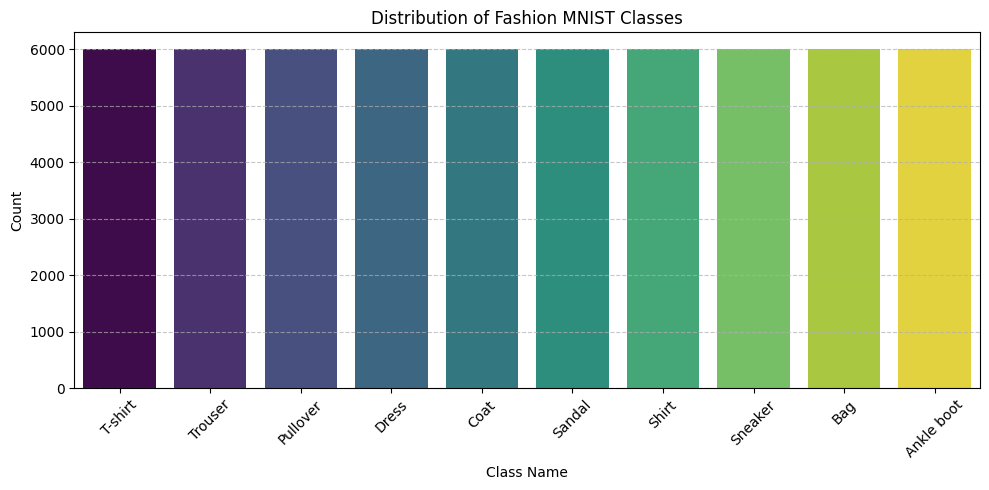

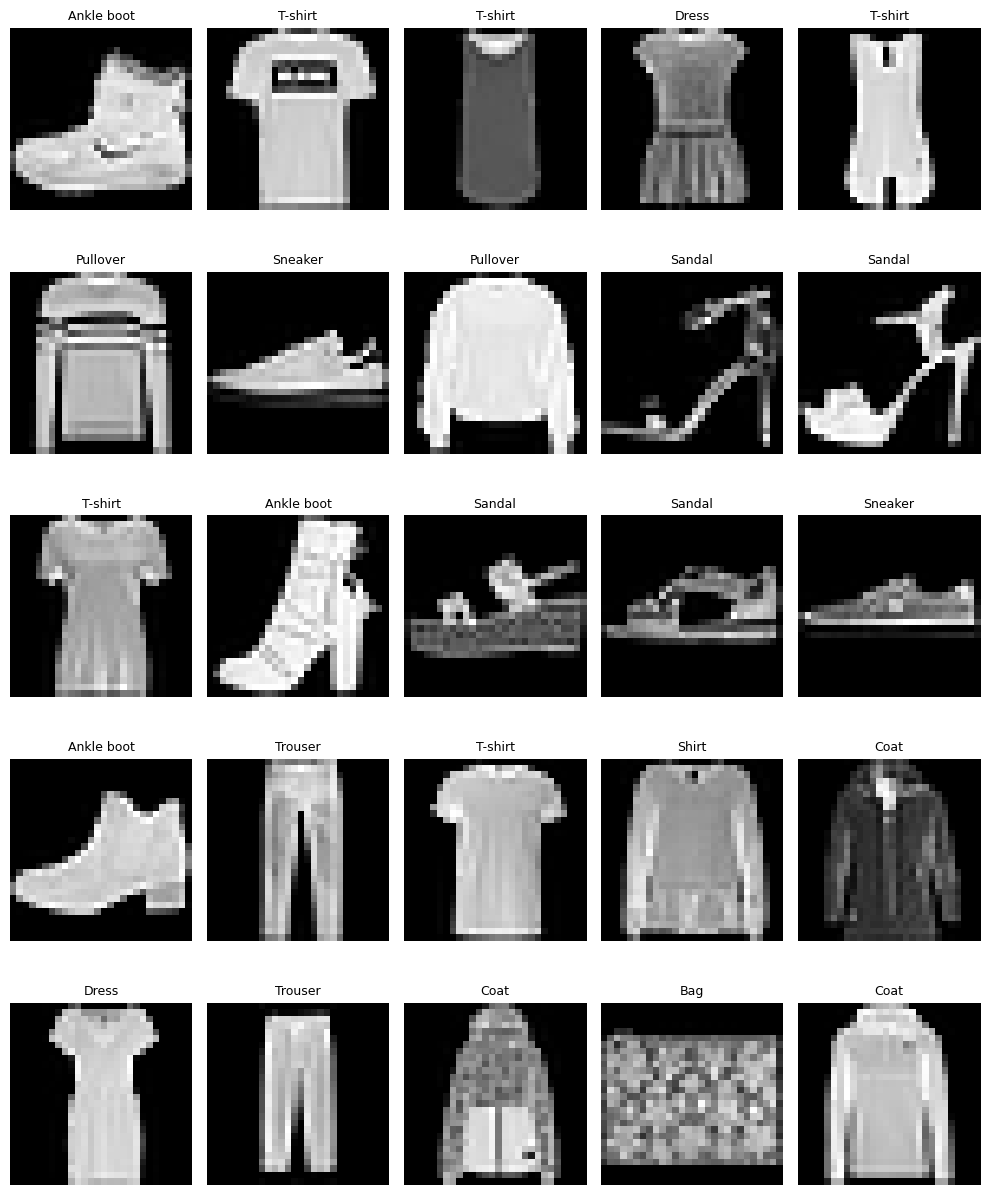

In [19]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [20]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [21]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [22]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [24]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 9s - 23ms/step - accuracy: 0.7804 - loss: 0.6448 - val_accuracy: 0.8380 - val_loss: 0.4447
Epoch 2/20
375/375 - 1s - 4ms/step - accuracy: 0.8427 - loss: 0.4486 - val_accuracy: 0.8589 - val_loss: 0.3853
Epoch 3/20
375/375 - 3s - 8ms/step - accuracy: 0.8559 - loss: 0.4034 - val_accuracy: 0.8720 - val_loss: 0.3500
Epoch 4/20
375/375 - 2s - 6ms/step - accuracy: 0.8635 - loss: 0.3763 - val_accuracy: 0.8688 - val_loss: 0.3646
Epoch 5/20
375/375 - 2s - 4ms/step - accuracy: 0.8714 - loss: 0.3575 - val_accuracy: 0.8678 - val_loss: 0.3627
Epoch 6/20
375/375 - 2s - 6ms/step - accuracy: 0.8758 - loss: 0.3434 - val_accuracy: 0.8723 - val_loss: 0.3535
Epoch 7/20
375/375 - 1s - 4ms/step - accuracy: 0.8819 - loss: 0.3305 - val_accuracy: 0.8724 - val_loss: 0.3528
Epoch 8/20
375/375 - 1s - 4ms/step - accuracy: 0.8850 - loss: 0.3188 - val_accuracy: 0.8827 - val_loss: 0.3247
Epoch 9/20
375/375 - 1s - 4ms/step - accuracy: 0.8878 - loss: 0.3112 - val_accuracy: 0.8701 - val_loss: 0.3628


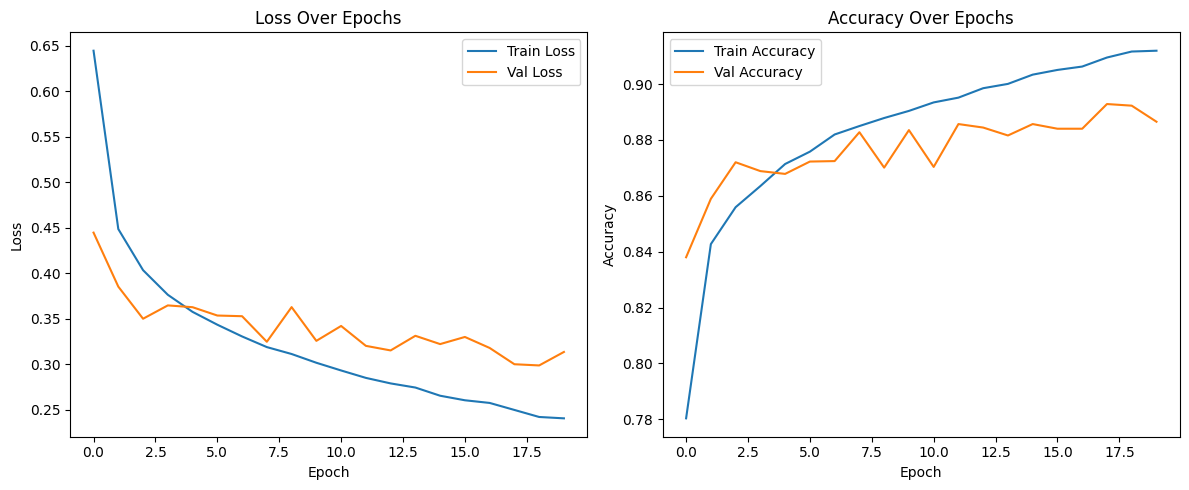

In [25]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [26]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8805


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


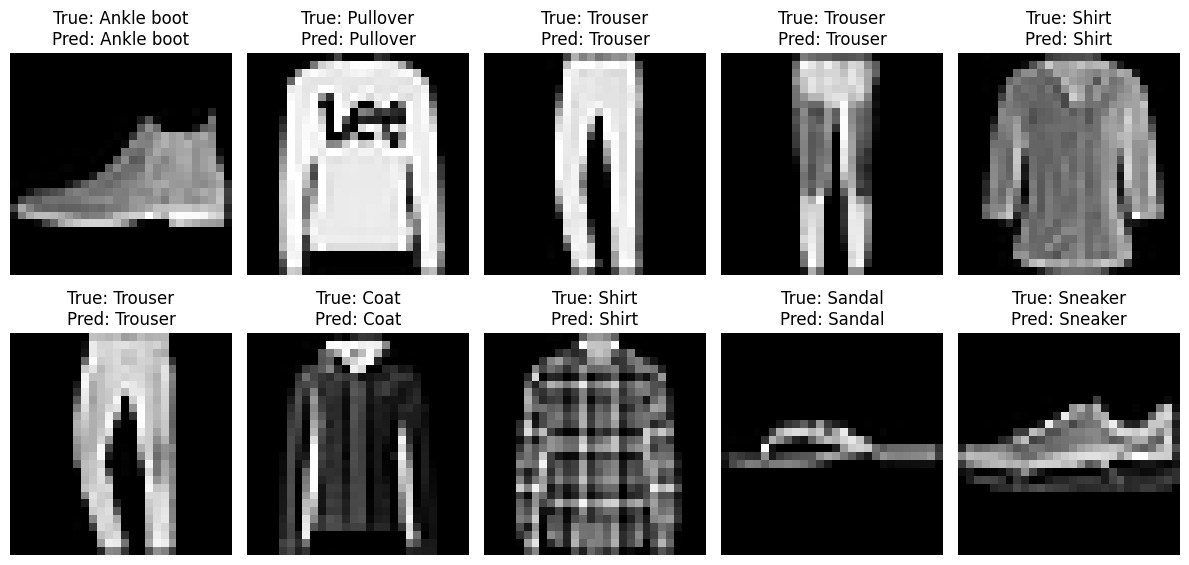

In [27]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

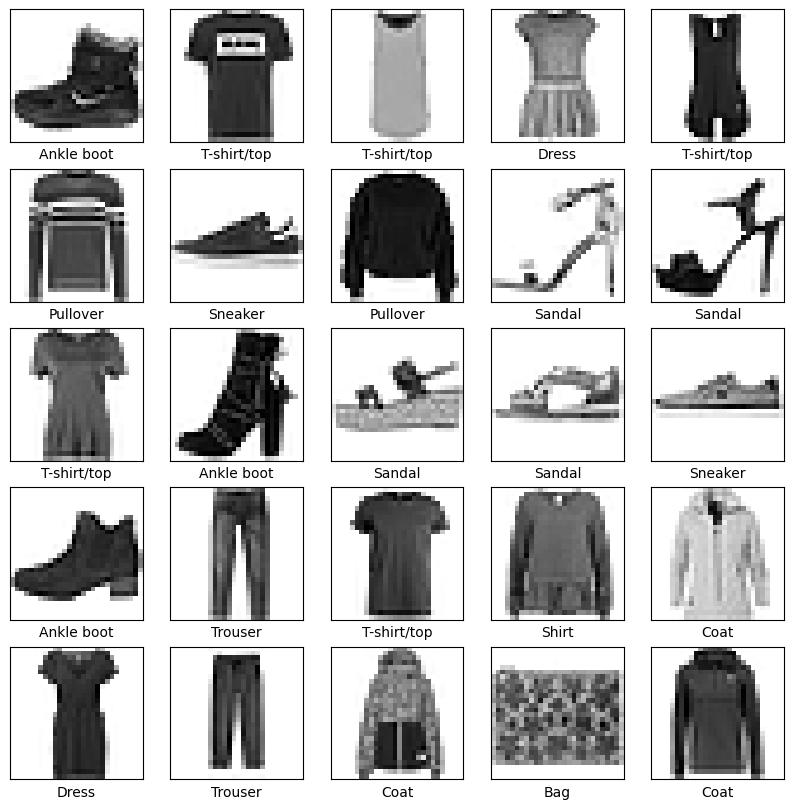

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, Activation, BatchNormalization, Dropout, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train_flat = x_train.reshape(-1,784).astype('float32') / 255.0
x_test_flat = x_test.reshape(-1,784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [37]:
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = GaussianNoise(0.05)(inputs)
    x=Dropout(0.2)(x)
    x = Dense(512, kernel_regularizer=l2(5e-4))(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dropout(0.6)(x)

    x1 = Dense(512, kernel_regularizer=l2(5e-4))(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('swish')(x1)
    x1 = Dropout(0.6)(x1)

    x2 = Dense(512, kernel_regularizer=l2(5e-4))(x1)
    x2 = BatchNormalization()(x2)
    res1 = Add()([x, x2])
    res1 = Activation('swish')(res1)

    x3 = Dense(256, kernel_regularizer=l2(5e-4))(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('swish')(x3)
    x3 = Dropout(0.5)(x3)

    x4 = Dense(256, kernel_regularizer=l2(5e-4))(x3)
    x4 = BatchNormalization()(x4)
    res1_down = Dense(256, kernel_regularizer=l2(5e-4))(res1)
    res1_down = BatchNormalization()(res1_down)
    res2 = Add()([res1_down, x4])
    res2 = Activation('swish')(res2)

    x_final = Dense(128, kernel_regularizer=l2(5e-4))(res2)
    x_final = BatchNormalization()(x_final)
    x_final = Activation('swish')(x_final)
    x_final = Dropout(0.4)(x_final)

    outputs = Dense(10, activation='softmax')(x_final)
    return Model(inputs, outputs)

In [38]:

dnn_model = create_dnn()
resnet_model = create_resnet_dnn()
optimizer = Adam(learning_rate=0.0002, weight_decay=1e-4)

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)]

In [39]:
dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=10,
                            batch_size=128,
                           validation_split=0.2,
                           verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                  batch_size=128,
                                  epochs=200,
                                  validation_data=(x_test_flat, y_test),
                                  callbacks=callbacks,
                                  verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7302 - loss: 0.7588 - val_accuracy: 0.8418 - val_loss: 0.4428
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8577 - loss: 0.3846 - val_accuracy: 0.8652 - val_loss: 0.3724
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8742 - loss: 0.3391 - val_accuracy: 0.8720 - val_loss: 0.3658
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8807 - loss: 0.3209 - val_accuracy: 0.8712 - val_loss: 0.3568
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8897 - loss: 0.2989 - val_accuracy: 0.8795 - val_loss: 0.3319
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8966 - loss: 0.2782 - val_accuracy: 0.8821 - val_loss: 0.3325
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8982 - loss: 0.2700 - val_accuracy: 0.8831 - val_loss: 0.3153
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9061 - loss: 0.2486 - val_accuracy: 0.

In [40]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

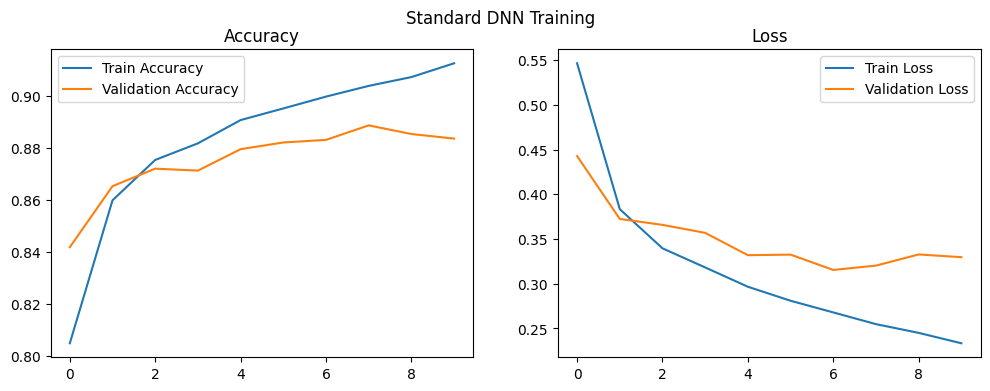

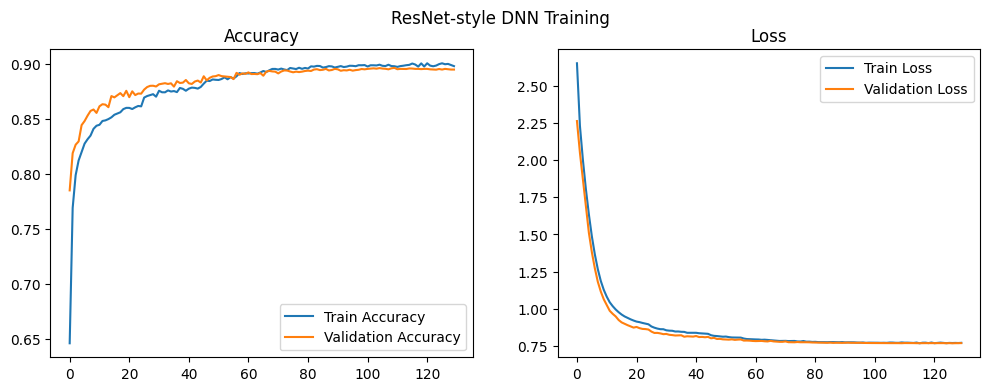

In [41]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [42]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [43]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8825
ResNet-style DNN Test Accuracy: 0.8963



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


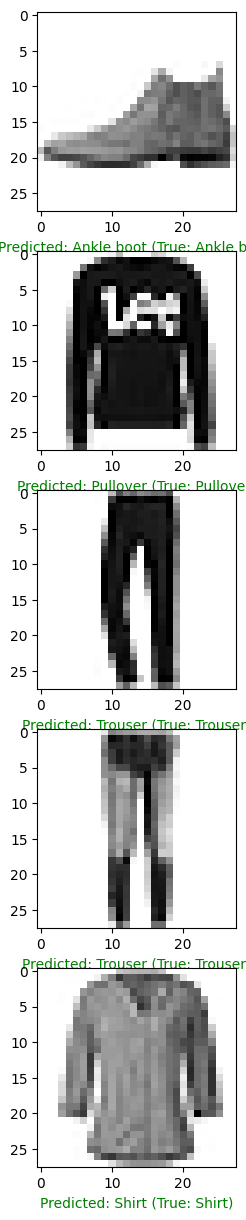


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


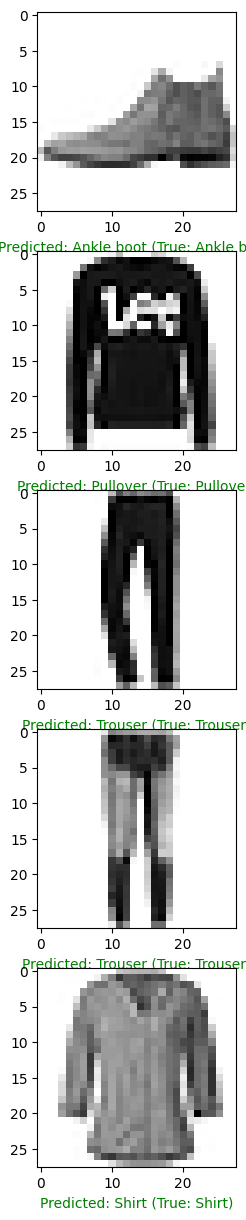

In [44]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)

# Comparison Report: Standard DNN vs ResNet-style DNN

## Overview

We implemented and trained two different neural network architectures on the same dataset for a classification task with 10 output classes:

1. **Standard DNN**: A straightforward deep neural network with multiple dense layers and ReLU activations.
2. **ResNet-style DNN**: An enhanced deep neural network incorporating residual connections, batch normalization, dropout, and advanced activation functions.

---

## Model Architectures

### 1. Standard DNN

- Input layer with shape `(784,)` (flattened input).
- Four dense layers with sizes `[256, 256, 128, 64]`, each followed by ReLU activation.
- Output layer with 10 units and softmax activation for classification.

### 2. ResNet-style DNN

- Input layer with shape `(784,)`.
- Added **Gaussian Noise** (stddev = 0.05) on inputs to improve robustness.
- Applied **Dropout (0.2)** immediately after the input to reduce overfitting.
- Multiple dense layers with sizes 512 and 256, each followed by:
  - **L2 regularization** (`5e-4`) to prevent overfitting.
  - **Batch Normalization** for stable and faster training.
  - **Swish activation function** for better gradient flow.
  - **Dropout** layers with rates from 0.4 to 0.6.
- **Residual connections** (Add layers) that skip one or more layers to help combat the vanishing gradient problem and allow training of deeper networks.
- Final dense layers reducing dimension from 256 to 128 before the output layer.

---

## Training Details

| Aspect                | Standard DNN           | ResNet-style DNN            |
|-----------------------|-----------------------|-----------------------------|
| Epochs                | 10                    | 200                         |
| Batch Size            | 128                   | 128                         |
| Validation Split/Data | 20% validation split  | Validation on test dataset  |
| Regularization        | None                  | L2 regularization, dropout  |
| Normalization         | None                  | Batch Normalization         |
| Activation            | ReLU                  | Swish                       |
| Residual Connections  | No                    | Yes                         |
| Noise Injection       | No                    | GaussianNoise(0.05)         |

---

## Results

| Metric            | Standard DNN | ResNet-style DNN |
|-------------------|--------------|------------------|
| Test Accuracy     | 88.25%       | **89.63%**       |

---

## Key Takeaways

- The **ResNet-style DNN** shows improved test accuracy (+1.38%) compared to the standard DNN, indicating better generalization.
- Incorporation of **residual connections** allows deeper network training by mitigating vanishing gradients.
- Use of **Batch Normalization** and **Dropout** helped stabilize training and reduced overfitting.
- **Gaussian noise** on inputs acted as a data augmentation technique improving robustness.
- The **Swish activation** outperformed the standard ReLU by allowing smoother gradient flow.
- The **L2 regularization** constrained model complexity, further aiding in generalization.

---

## Conclusion

The ResNet-style DNN architecture demonstrates superior performance and robustness over a standard deep neural network by leveraging multiple modern deep learning techniques such as residual learning, normalization, dropout, and advanced activation functions. These improvements come with increased training time but result in better model accuracy and reliability.
